In [35]:
import psycopg2
import pandas as pd
from math import log

In [49]:
with psycopg2.connect(dbname="recomendaciones-steam", user="postgres", password="postgres") as conn:
    cur = conn.cursor()
    cur.execute("select item_id, avg(playtime) as average from playtime  group by item_id order by average desc;")

In [50]:
data = [(item, float(playtime)) for (item, playtime) in cur.fetchall()]
df = pd.DataFrame(data, columns=['item_id', 'avg_playtime'])

array([[<Axes: title={'center': 'avg_playtime'}>]], dtype=object)

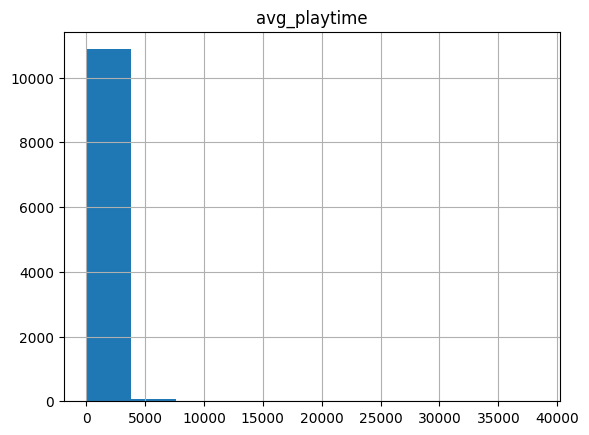

In [51]:
df.hist(column='avg_playtime')

array([[<Axes: title={'center': 'avg_playtime'}>]], dtype=object)

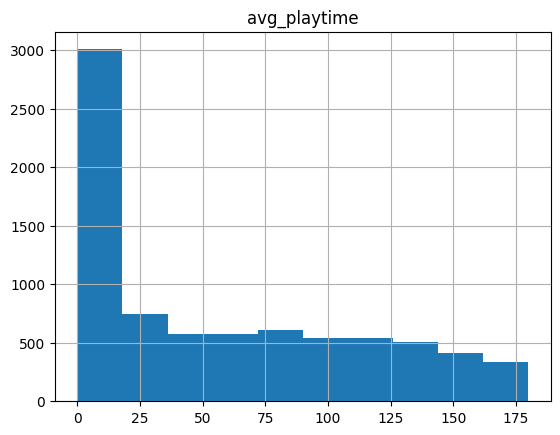

In [60]:
df.where(lambda f: f['avg_playtime'] < 180).hist(column='avg_playtime')

In [53]:
df['log_avg_playtime'] = df.apply(lambda f: log(f['avg_playtime']), axis=1)

ValueError: math domain error

array([[<Axes: title={'center': 'log_avg_playtime'}>]], dtype=object)

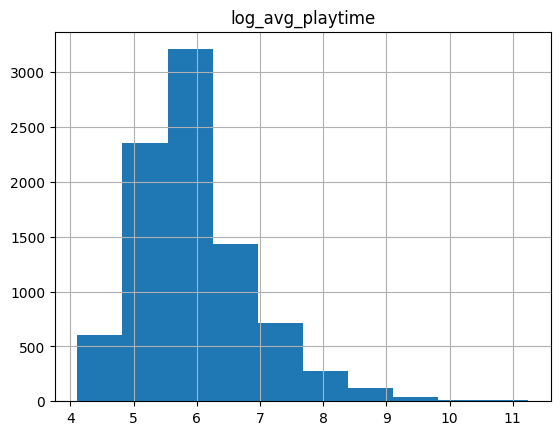

In [44]:
df.hist(column='log_avg_playtime')

array([[<Axes: title={'center': 'log_avg_playtime'}>]], dtype=object)

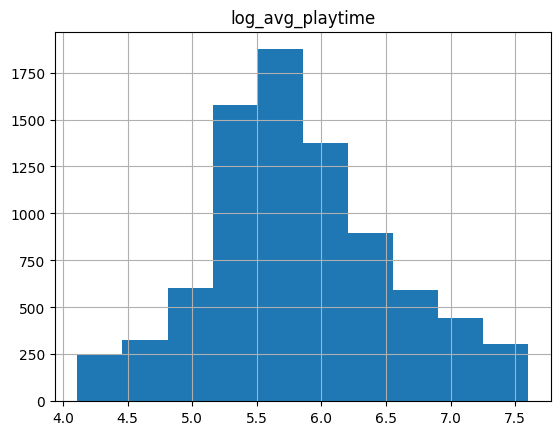

In [42]:
df.where(lambda f: f['avg_playtime'] < 2000).hist(column='log_avg_playtime')

<Axes: >

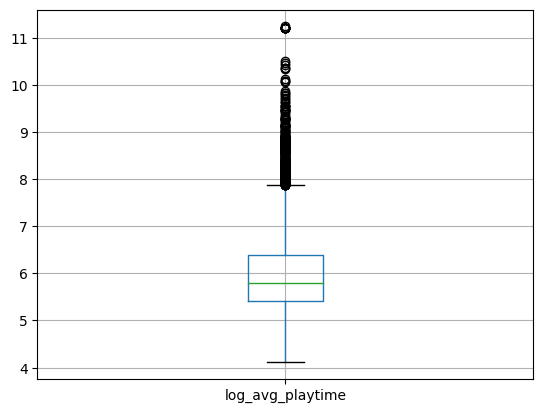

In [48]:
df.boxplot(column='log_avg_playtime')

<Axes: >

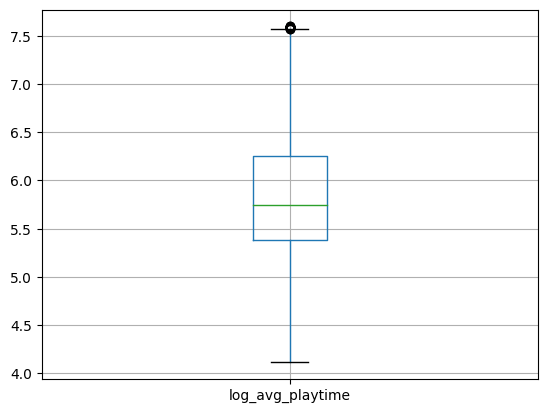

In [47]:
df.where(lambda f: f['avg_playtime'] < 2000).boxplot(column='log_avg_playtime')